In [1]:
import torch
from torch import nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device


'cpu'

In [4]:
X,y=make_blobs(n_samples=3000,
               n_features=2,
               centers=4,
               cluster_std=0.5,
               random_state=42)

In [5]:
from sklearn.model_selection import train_test_split

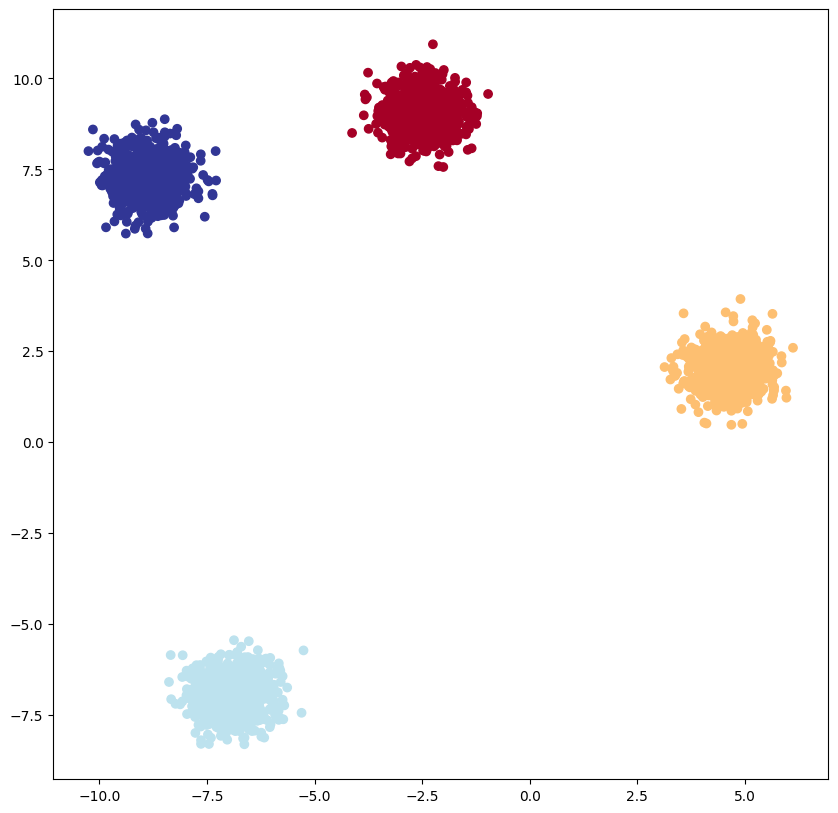

In [6]:
fig = plt.figure(figsize = (10, 10))
ax = plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [7]:
X_train_numpy,X_test_numpy,y_train_numpy,y_test_numpy=train_test_split(X,
                                               y,
                                               test_size=0.2
                                               )

In [8]:
X_train,X_test,y_train,y_test=torch.tensor(X_train_numpy,dtype=torch.float32),torch.tensor(X_test_numpy,dtype=torch.float32),torch.tensor(y_train_numpy,dtype=torch.long),torch.tensor(y_test_numpy,dtype=torch.long)


In [9]:
X_train,X_test,y_train,y_test=X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)

In [10]:
class blob_classification(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.input_layer=nn.Linear(in_features=2,out_features=8)
    self.hidden1=nn.Linear(in_features=8,out_features=16)
    self.hidden2=nn.Linear(in_features=16,out_features=16)
    self.output=nn.Linear(in_features=16,out_features=4)
    self.relu=nn.ReLU()
  def forward(self,x):
    return (self.output(self.relu(self.hidden2(self.relu(self.hidden1(self.relu(self.input_layer(x))))))))

In [11]:
model_0=blob_classification()
model_0.to(device)

blob_classification(
  (input_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden1): Linear(in_features=8, out_features=16, bias=True)
  (hidden2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=4, bias=True)
  (relu): ReLU()
)

In [12]:
y[:40]

array([2, 0, 0, 0, 2, 0, 2, 2, 3, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 3, 2, 1,
       2, 3, 3, 3, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 3])

In [13]:
loss_fn=torch.nn.CrossEntropyLoss()

In [14]:
optimizer=torch.optim.SGD(params=model_0.parameters(),
                           lr=0.001)

In [15]:
epochs=10000


In [16]:
for epoch in range(epochs):
  model_0.train()
  prediction=model_0(X_train)
  loss=loss_fn(prediction,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(epoch%100==0):
    print(loss)

tensor(1.3191, grad_fn=<NllLossBackward0>)
tensor(1.2798, grad_fn=<NllLossBackward0>)
tensor(1.2364, grad_fn=<NllLossBackward0>)
tensor(1.1885, grad_fn=<NllLossBackward0>)
tensor(1.1296, grad_fn=<NllLossBackward0>)
tensor(1.0660, grad_fn=<NllLossBackward0>)
tensor(1.0027, grad_fn=<NllLossBackward0>)
tensor(0.9417, grad_fn=<NllLossBackward0>)
tensor(0.8850, grad_fn=<NllLossBackward0>)
tensor(0.8337, grad_fn=<NllLossBackward0>)
tensor(0.7881, grad_fn=<NllLossBackward0>)
tensor(0.7478, grad_fn=<NllLossBackward0>)
tensor(0.7116, grad_fn=<NllLossBackward0>)
tensor(0.6785, grad_fn=<NllLossBackward0>)
tensor(0.6475, grad_fn=<NllLossBackward0>)
tensor(0.6177, grad_fn=<NllLossBackward0>)
tensor(0.5888, grad_fn=<NllLossBackward0>)
tensor(0.5604, grad_fn=<NllLossBackward0>)
tensor(0.5326, grad_fn=<NllLossBackward0>)
tensor(0.5053, grad_fn=<NllLossBackward0>)
tensor(0.4788, grad_fn=<NllLossBackward0>)
tensor(0.4534, grad_fn=<NllLossBackward0>)
tensor(0.4292, grad_fn=<NllLossBackward0>)
tensor(0.40

In [17]:
with torch.inference_mode():
  test_pred=model_0(X_test)

In [18]:
pred=torch.softmax(test_pred,dim=1)

In [19]:
import numpy as np
pred=torch.argmax(test_pred,dim=1)
pred=np.array(pred.cpu().numpy())

In [20]:
pred[:10]

array([2, 3, 0, 1, 0, 2, 0, 0, 1, 2])

In [21]:
from pathlib import Path
import requests
if(Path("helper_functions.py").is_file()):
  print("file already exists")
else:
  with open("helper_functions.py","wb") as f:
    req=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    f.write(req.content)

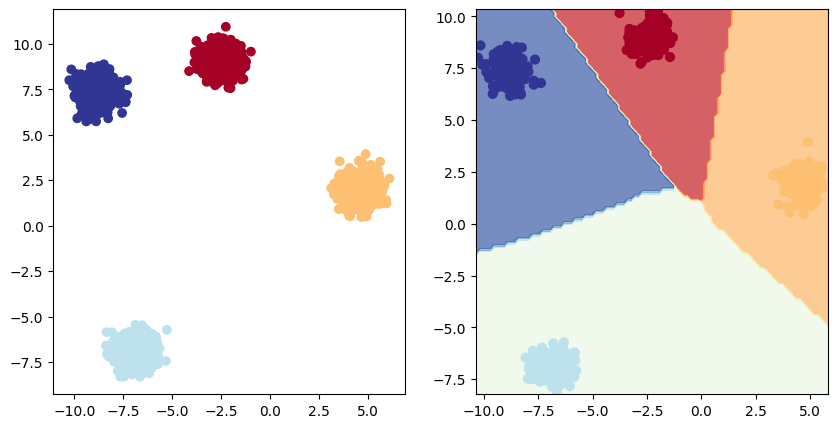

In [22]:
from helper_functions import plot_decision_boundary
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.subplot(1,2,2)
plot_decision_boundary(model_0,X_test,y_test)

In [23]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [28]:
from torchmetrics import Accuracy
model_accuracy=Accuracy(task="multiclass",num_classes=4).to(device)
model_accuracy(test_pred,y_test)

tensor(1.)